# Titanic Survival Rate Predictions

### Importing packages

In [554]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


### Explorating Data

In [555]:
# Importing data csv as pandas df.
raw_train = pd.read_csv('train.csv',index_col=0)
raw_test = pd.read_csv('test.csv',index_col=0)

In [556]:
# General overview of the data
raw_train.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [557]:
# General information.
raw_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [558]:
# Null values. Seems like we'll have some null values to handle in Age, Cabin, Fare and Embarked.
print(raw_train.isnull().sum())
print(raw_test.isnull().sum())

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64
Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64


In [559]:
raw_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [560]:
# There are no duplicates in out datasets.
dup_train = raw_train.duplicated().any()
dup_test = raw_test.duplicated().any()
print(dup_train)
print(dup_test)

False
False


In [561]:
# Splitting out master train file into train and valid 80/20 in order to be able to measure performance.
x = raw_train.drop(["Survived"],axis=1)
y = raw_train["Survived"]
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.20, random_state=8)

### Data cleaning

In [562]:
# We'll replace NaN values for Age, Fare and Embarked. Cabin has too many NaN to be useful in our models.
# Where applicable, we'll always use the same values calculated for train in test. To avoid leakage.

x_train["Age"] = x_train["Age"].fillna(x_train["Age"].median())
x_valid["Age"] = x_valid["Age"].fillna(x_train["Age"].median())
raw_test["Age"] = raw_test["Age"].fillna(x_train["Age"].median())

x_train["Embarked"] = x_train["Embarked"].fillna(x_train["Embarked"].mode()[0])
x_valid["Embarked"] = x_valid["Embarked"].fillna(x_train["Embarked"].mode()[0])
raw_test["Embarked"] = raw_test["Embarked"].fillna(x_train["Embarked"].mode()[0])

x_train["Fare"] = x_train["Fare"].fillna(x_train["Fare"].mean())
x_valid["Fare"] = x_valid["Fare"].fillna(x_train["Fare"].mean())
raw_test["Fare"] = raw_test["Fare"].fillna(x_train["Fare"].mean())

x_train['Cabin'].fillna('Missing', inplace=True)
x_valid['Cabin'].fillna('Missing', inplace=True)
raw_test['Cabin'].fillna('Missing', inplace=True)

In [563]:
print(x_train.isnull().sum())
print(x_valid.isnull().sum())
print(raw_test.isnull().sum())

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64


In [564]:
print(x_train.head(10))


             Pclass                               Name     Sex   Age  SibSp  \
PassengerId                                                                   
769               3                Moran, Mr. Daniel J    male  29.0      1   
388               2                   Buss, Miss. Kate  female  36.0      0   
824               3                 Moor, Mrs. (Beila)  female  27.0      0   
779               3            Kilgannon, Mr. Thomas J    male  29.0      0   
158               3                    Corn, Mr. Harry    male  30.0      0   
662               3                  Badt, Mr. Mohamed    male  40.0      0   
393               3       Gustafsson, Mr. Johan Birger    male  28.0      2   
58                3                Novel, Mr. Mansouer    male  28.5      0   
864               3  Sage, Miss. Dorothy Edith "Dolly"  female  29.0      8   
251               3             Reed, Mr. James George    male  29.0      0   

             Parch           Ticket     Fare    Cab

In [565]:
#Creating the label encoder
encoder_c = LabelEncoder()
encoder_e = LabelEncoder()

#Fitting the encoder on the raw_train['Cabin'] column
encoder_c.fit(pd.concat([x_train['Cabin'], x_valid['Cabin'], raw_test['Cabin']]))
encoder_e.fit(x_train['Embarked'])

#Transforming the x_train['Cabin'], x_valid['Cabin'] and raw_test['Cabin'] columns using the fitted encoder
x_train['Cabin'] = encoder_c.transform(x_train['Cabin'])
x_valid['Cabin'] = encoder_c.transform(x_valid['Cabin'])
raw_test['Cabin'] = encoder_c.transform(raw_test['Cabin'])

x_train['Embarked'] = encoder_e.transform(x_train['Embarked'])
x_valid['Embarked'] = encoder_e.transform(x_valid['Embarked'])
raw_test['Embarked'] = encoder_e.transform(raw_test['Embarked'])
x_train.head(50)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
769,3,"Moran, Mr. Daniel J",male,29.0,1,0,371110,24.1500,185,1
388,2,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0000,185,2
824,3,"Moor, Mrs. (Beila)",female,27.0,0,1,392096,12.4750,150,2
779,3,"Kilgannon, Mr. Thomas J",male,29.0,0,0,36865,7.7375,185,1
158,3,"Corn, Mr. Harry",male,30.0,0,0,SOTON/OQ 392090,8.0500,185,2
662,3,"Badt, Mr. Mohamed",male,40.0,0,0,2623,7.2250,185,0
393,3,"Gustafsson, Mr. Johan Birger",male,28.0,2,0,3101277,7.9250,185,2
58,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,7.2292,185,0
864,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.0,8,2,CA. 2343,69.5500,185,2


In [566]:
# Dictionary for numerical conversion of column sex
factors = {'male': 0, 'female': 1}

# Applying the same conversion to all df
x_train['Sex'] = x_train['Sex'].map(factors)
x_valid['Sex'] = x_valid['Sex'].map(factors)
raw_test['Sex'] = raw_test['Sex'].map(factors)

In [567]:
x_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
769,3,"Moran, Mr. Daniel J",0,29.0,1,0,371110,24.1500,185,1
388,2,"Buss, Miss. Kate",1,36.0,0,0,27849,13.0000,185,2
824,3,"Moor, Mrs. (Beila)",1,27.0,0,1,392096,12.4750,150,2
779,3,"Kilgannon, Mr. Thomas J",0,29.0,0,0,36865,7.7375,185,1
158,3,"Corn, Mr. Harry",0,30.0,0,0,SOTON/OQ 392090,8.0500,185,2


In [568]:
# Preparing files before starting to fit ML models to the data
x_train = x_train.drop(['Name', 'Ticket'], axis=1)
x_valid = x_valid.drop(['Name', 'Ticket'], axis=1)
clean_test = raw_test.drop(['Name', 'Ticket'], axis=1)

### Decision Tree

In [569]:
dtree = DecisionTreeClassifier(random_state=6, max_depth=5, min_samples_split=4)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=4, random_state=6)

In [570]:
predictions_tree = dtree.predict(x_valid)

In [571]:
# Comparaison performance train vs valid
print('Training set score: {:.4f}'.format(dtree.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(dtree.score(x_valid, y_valid)))

Training set score: 0.8567
Test set score: 0.8045


In [572]:
# Classification report
print(classification_report(y_valid,predictions_tree))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       108
           1       0.79      0.69      0.74        71

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



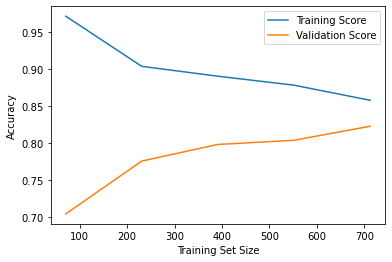

In [573]:
# Learning curve Tree
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

x = pd.concat([x_train, x_valid], ignore_index=True)
y = pd.concat([y_train, y_valid], ignore_index=True)

# Generate the training and validation set sizes
train_sizes, train_scores, valid_scores = learning_curve(dtree, x, y, cv=5, scoring='accuracy')

# Plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, valid_scores.mean(axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [574]:
print(y_train.head())

PassengerId
769    0
388    1
824    1
779    0
158    0
Name: Survived, dtype: int64


### Random Forest

In [575]:
rfc = RandomForestClassifier(n_estimators=150, random_state=6)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=150, random_state=6)

In [576]:
predictions_rfc = rfc.predict(x_valid)

In [577]:
# Classification report
print(classification_report(y_valid,predictions_rfc))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       108
           1       0.78      0.75      0.76        71

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



In [578]:
# Comparaison performance train vs valid
print('Training set score: {:.4f}'.format(rfc.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(rfc.score(x_valid, y_valid)))

Training set score: 0.9817
Test set score: 0.8156


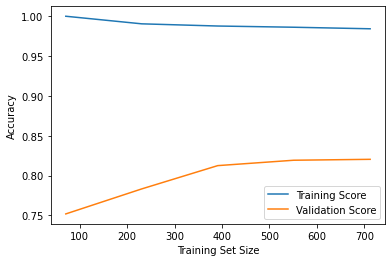

In [579]:
# Learning curve Tree
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Generate the training and validation set sizes
train_sizes, train_scores, valid_scores = learning_curve(rfc, x, y, cv=5, scoring='accuracy')

# Plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, valid_scores.mean(axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Applying model on test dataset for submission

In [580]:
predictions_test_dtree = dtree.predict(clean_test)

In [581]:
final_predictions = pd.DataFrame({'Survived': predictions_test_dtree}, index=clean_test.index)
final_predictions

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [582]:
final_predictions.to_csv('survival_submission.csv')